# K-Means Clustering Assignment for EastWest Airlines Dataset

## Exploring the Dataset


The EastWest Airlines dataset is significant for the following reasons:

- Customer Segmentation: By clustering the data, EastWest Airlines can segment their customers into distinct groups based on their travel and loyalty patterns. This helps in understanding different customer profiles and tailoring services and communications accordingly.

- Targeted Marketing: Knowing customer segments allows EastWest Airlines to target specific groups with customized offers and promotions, increasing the likelihood of customer engagement and conversion.

Before applying clustering algorithms like K-Means, it is crucial to explore and understand the dataset thoroughly. Here are the steps involved:

- Data Cleaning: Handle missing values, outliers, and inconsistent data entries. This ensures that the data is reliable for analysis.
- Data Normalization: Scale the features to ensure that no single attribute dominates the clustering process due to its scale. Methods like standardization or min-max scaling can be used.
- Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of each attribute, identify patterns, and detect any anomalies. Visualizations such as histograms, box plots, and scatter plots are useful here.
- Feature Selection: Choose relevant features that contribute meaningfully to the clustering process. This may involve domain knowledge and correlation analysis.
- Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can be applied to reduce the dimensionality of the dataset, making the clustering process more efficient and interpretable.

By following these steps, we can prepare the credit card dataset for effective clustering analysis, leading to valuable insights and actionable business strategies.

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
# Load the dataset
data = pd.read_csv("C:\Ozy\Data Science\DS datasets\EastWestAirlines.csv")

# Display the first few rows
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
# Summary statistics
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


## Data Cleaning

Data cleaning is essential to ensure the dataset is accurate and complete. Incomplete or incorrect data can lead to misleading results.

- Handling Missing Values: Missing values can distort the analysis and clustering. Techniques such as imputation (filling missing values with mean, median, or mode) or removing rows with missing values are common approaches.
- Removing Outliers: Outliers can skew the results of the clustering algorithm. Identifying and handling outliers through techniques like IQR (Interquartile Range) or Z-score helps maintain the integrity of the analysis.
- Ensuring Consistent Data Entries: Uniform data entries are crucial for accurate analysis. This involves checking for and correcting inconsistencies in the dataset.

In [11]:
# Check for missing values
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

There are no missing values present in the dataset

In [15]:
from sklearn.preprocessing import StandardScaler

# Exclude the 'ID' column from scaling
columns_to_scale = data.columns[1:]  # All columns except the 'ID'

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data[columns_to_scale])

# Convert back to DataFrame for convenience
data_scaled = pd.DataFrame(data_scaled, columns=columns_to_scale)

# Display the first few rows of the scaled data
data_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


## Exploratory Data Analysis (EDA)

EDA helps understand the data's distribution, relationships, and patterns. Here are some common techniques:

- Scatter Plots: Visualize the relationships between two continuous variables. Useful for identifying correlations and trends.
- Box Plots: Summarize the distribution of a variable, highlighting the median, quartiles, and potential outliers.
- Histograms: Show the frequency distribution of a single variable, helping identify skewness and kurtosis.
- Heatmaps: Display the correlation matrix, indicating the strength and direction of relationships between variables.

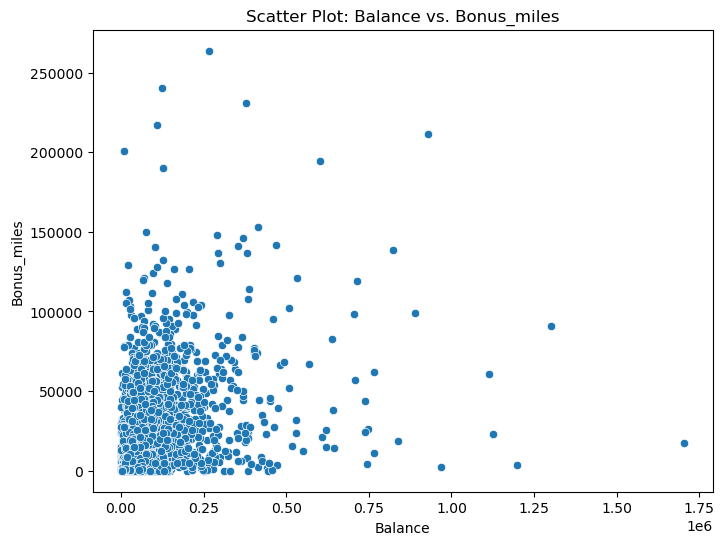

In [18]:
# Scatter Plots for Balance vs Bonus_miles
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', data=data)
plt.title('Scatter Plot: Balance vs. Bonus_miles')
plt.show()

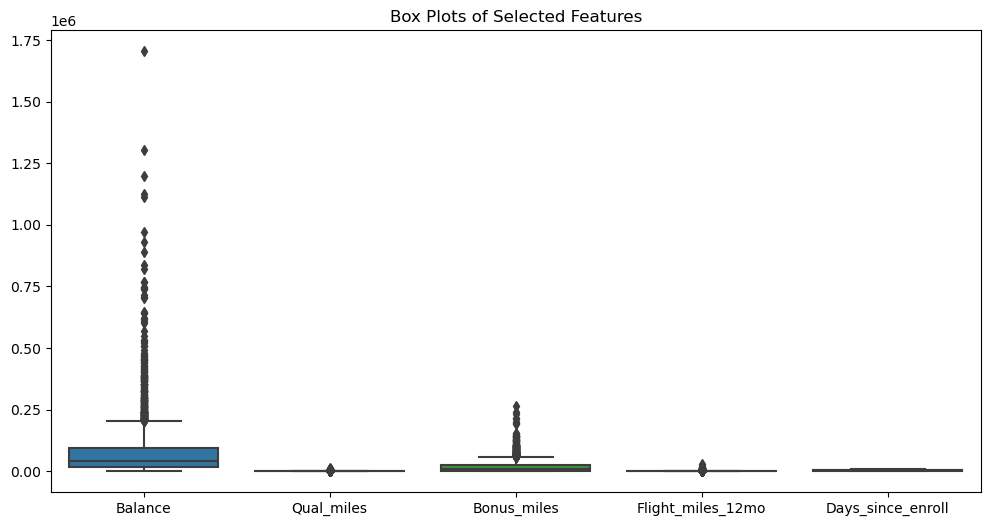

In [19]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']])
plt.title('Box Plots of Selected Features')
plt.show()

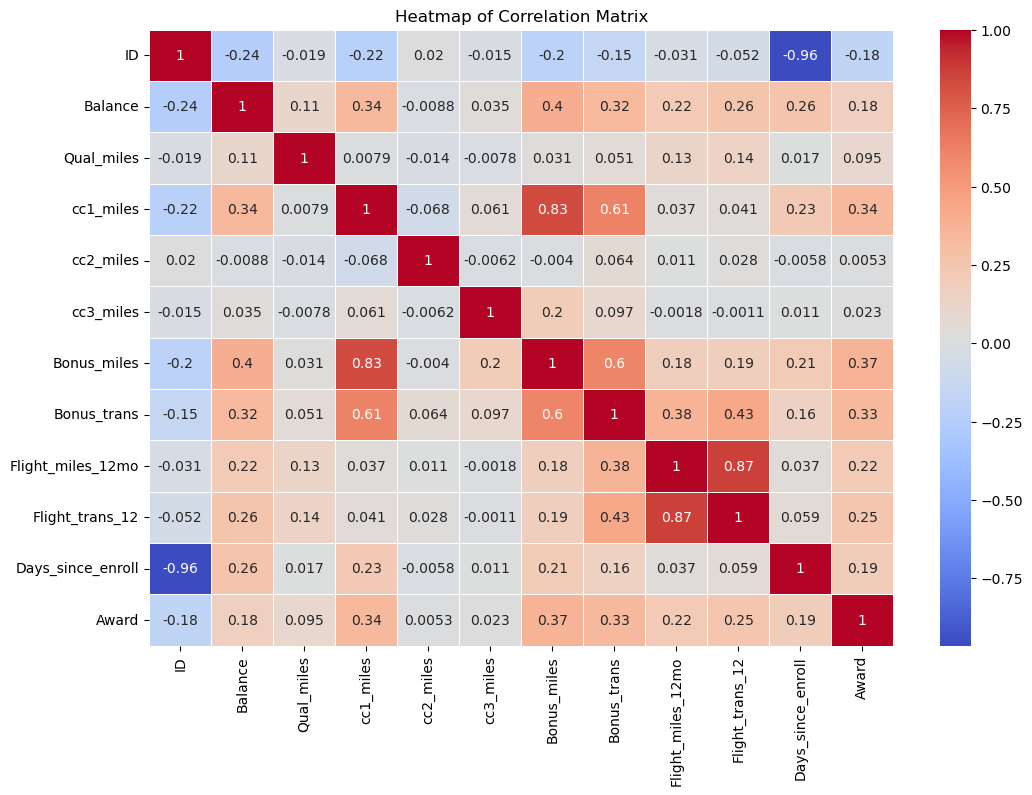

In [25]:
# Heatmaps
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Histograms or KDE plots can show the distribution of each feature, helping to understand their ranges and central tendencies.

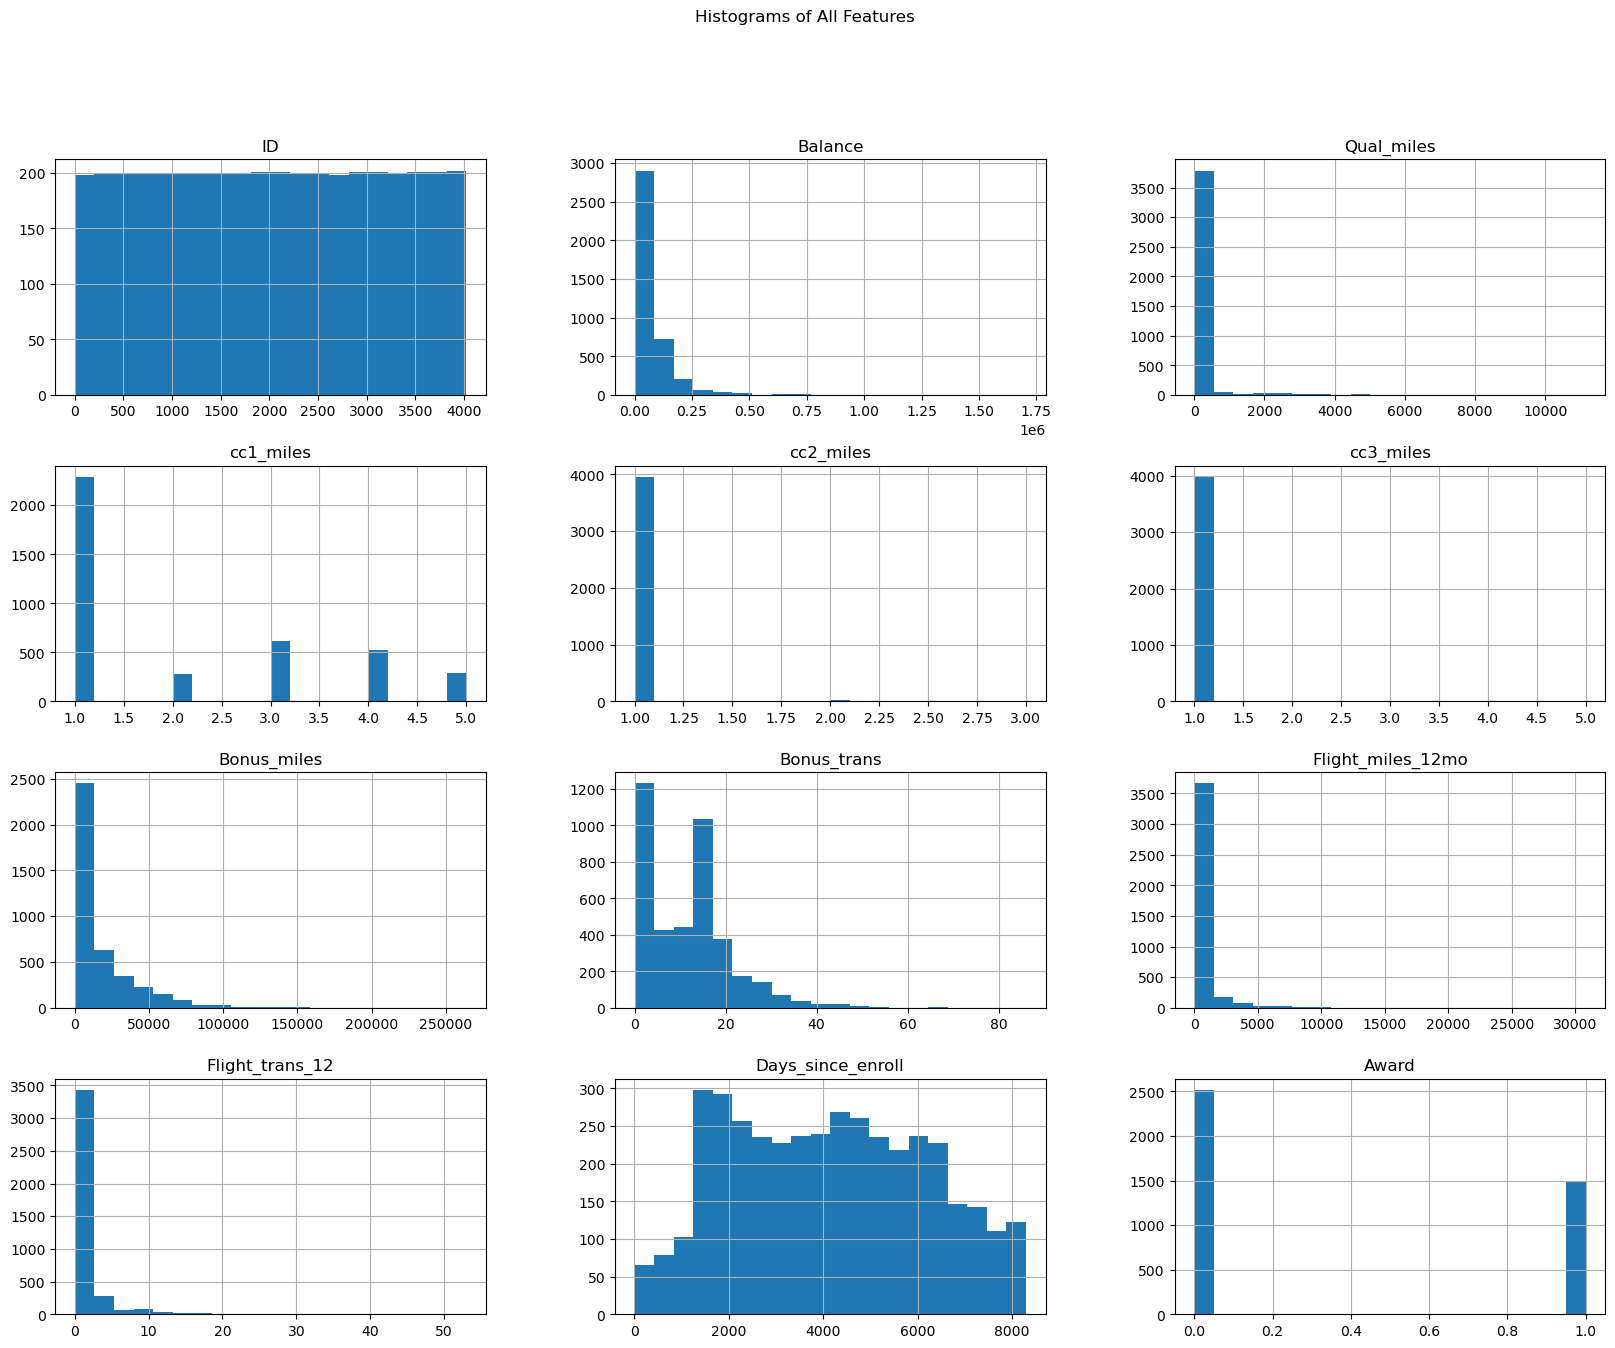

In [24]:
# Histograms
data.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

## Feature Selection

In [26]:
# Separate features and target variable
X = data.drop(columns=['ID'])  # Assuming 'ID' is not a feature
y = data['Award']  # Assuming 'Award' is the target variable

 ## Standardizing Features

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Dimensionality Reduction

Use techniques like Principal Component Analysis (PCA) if the dataset has many dimensions, which can simplify the clustering process and improve performance.

In [31]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df_pca = pca.fit_transform(X_scaled)

# Convert back to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

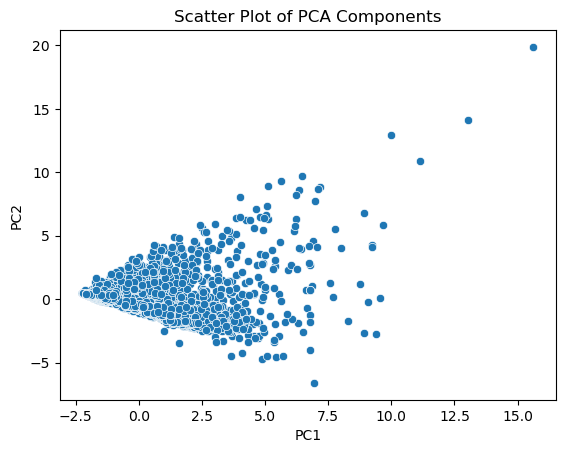

In [32]:
# Scatter plot of PCA components
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Scatter Plot of PCA Components')
plt.show()

## Choosing the Number of Clusters (K)

Selecting the appropriate number of clusters (K) is essential for effective clustering. Several methods can help determine the optimal K:

- Elbow Method: Plot the within-cluster sum of squares (WCSS) against the number of clusters. The elbow point, where the rate of decrease sharply slows, can be a good choice for K.

- Silhouette Score: Compute the silhouette score for different values of K and choose the K with the highest silhouette score. A higher silhouette score indicates better-defined clusters.

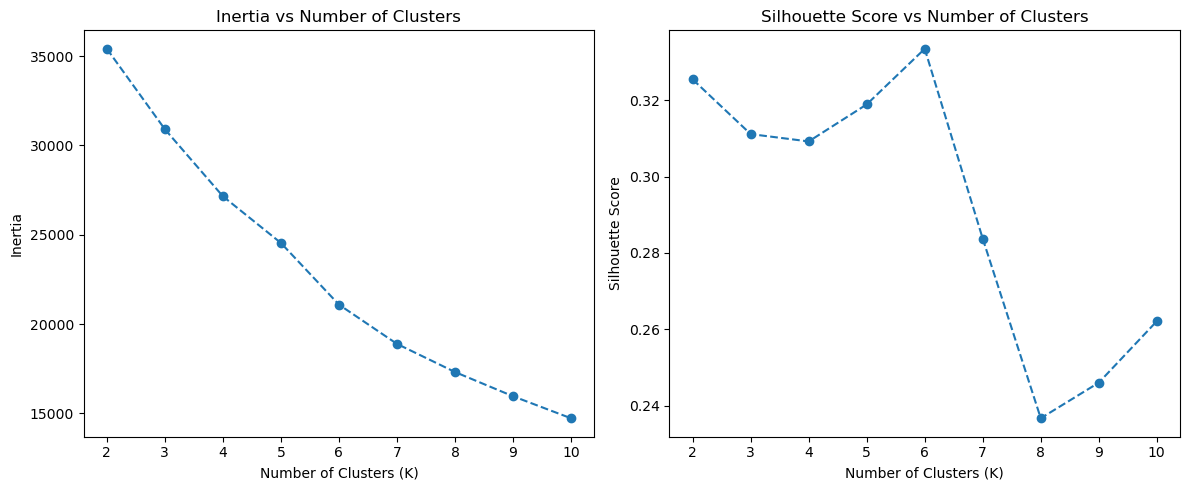

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and silhouette scores
inertia_values = []
silhouette_scores = []

# Iterate over different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)

    # Calculate WCSS
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting inertia and silhouette scores
plt.figure(figsize=(12, 5))

# Plot inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

Based on the plots, choose the value of K that seems most appropriate. The elbow point or the highest silhouette score can be good indicators.

By setting n_init explicitly, you ensure that your code behaves consistently across different versions of the library and avoids any potential changes in default behavior.

- kmeans.inertia_: This attribute represents the sum of squared distances of samples to their closest cluster center. In other words, it measures the within-cluster variance. Lower values of inertia indicate better clustering, where the data points are closer to their respective cluster centers.

- kmeans.labels_: This attribute contains the cluster labels assigned to each data point after clustering. Each data point is assigned to the cluster whose centroid is closest to it. The labels range from 0 to K-1, where K is the number of clusters specified.

## Selecting Initialization Methods

- Random Initialization: Randomly selects data points as initial centroids. This method is simple but can lead to suboptimal solutions.

- K-Means++ Initialization: A more sophisticated method that selects initial centroids to be far apart from each other. This often leads to better convergence and more robust clustering results.

In [35]:
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42)
kmeans_random

KMeans(init='random', n_clusters=10, random_state=42)

In [36]:
kmeans_kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_kmeans_pp

KMeans(n_clusters=10, random_state=42)

## Interpret Results and Choose Optimal K

- Inertia: Plot shows a clear elbow point at around K=3 or K=4. This indicates that adding more clusters beyond K=3 or K=4 doesn't significantly decrease inertia. Therefore, K=3 or K=4 could be potential candidates for the optimal number of clusters.
  
- Silhouette Scores: Plot shows that the silhouette score is highest at K=3 or K=4, indicating well-defined clusters. This aligns with the inertia plot, where the elbow point is observed around K=3 or K=4.

**Conclusion**:
Based on the provided interpretation, further analysis and visualization of the clustering results for K=3 and K=4 would be necessary to make a final decision on the optimal number of clusters.

## Finalize clustering with optimal K

By following these steps, you can implement the K-Means clustering algorithm, evaluate clustering quality, and determine the optimal number of clusters for your dataset.

In [40]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_
cluster_labels

array([1, 1, 1, ..., 0, 1, 1])

In [41]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_
cluster_labels

array([1, 1, 1, ..., 2, 1, 1])

## Analyze Resulting Clusters

This will give you insights into the average values of different features within each cluster, allowing you to understand the distinguishing characteristics of each cluster.

In [52]:
# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Group DataFrame by cluster and calculate mean or median values
cluster_char = df.groupby('Cluster').mean()  # You can also use .median()

# Display cluster characteristics
cluster_char.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,,
0,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
1,2243.737318,43793.917814,97.436886,1.221785,1.019269,1.000393,4700.690916,6.918993,198.621707,0.618168,3691.559969,0.201337
2,1596.204242,116817.336214,154.756481,3.701493,1.002357,1.001571,39216.199529,18.759623,334.355852,0.997643,4893.491752,0.648075
3,1752.964286,191573.726190,775.863095,2.172619,1.035714,1.000000,31412.160714,26.779762,5365.672619,15.636905,4665.827381,0.809524


## Evaluate Unclustered Data Points

Examine the data points that were not assigned to any cluster (if any). These points might represent outliers or data points with unique characteristics.

In K-Means clustering, every data point is assigned to a cluster. There won't be any data points that are "not assigned" to a cluster. The K-Means algorithm assigns each point to the nearest cluster center, ensuring that all points belong to one of the clusters.

In [45]:
# Identify unclustered data points
unclustered_data = df[df['Cluster'] == -1]
unclustered_data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster


Visualize Cluster Centers: Plot the centroids of each cluster to understand the center points around which the clusters are formed.

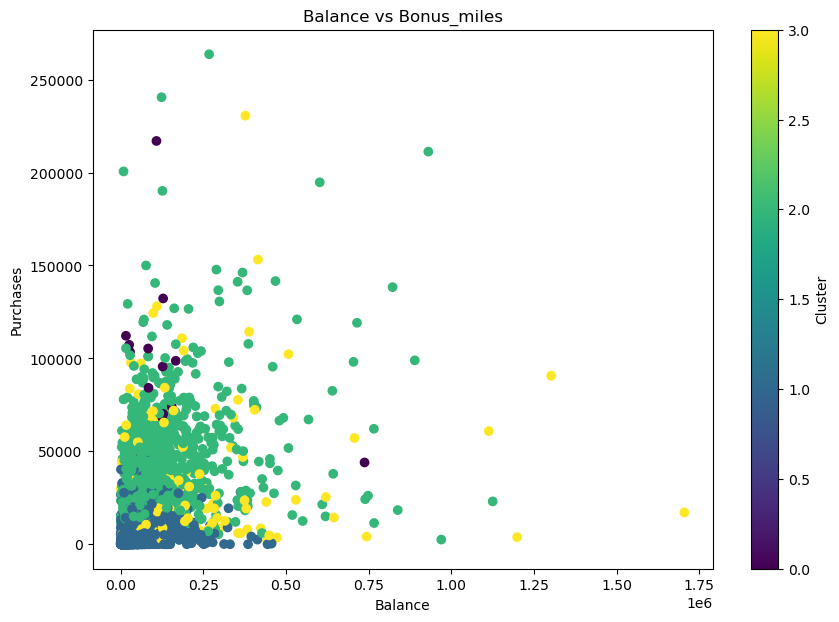

In [49]:
# Example scatter plot for visualizing clusters in 2D space
plt.figure(figsize=(10, 7))

# Assuming you want to visualize based on two features, e.g., 'BALANCE' and 'Bonus_miles'
plt.scatter(data['Balance'], data['Bonus_miles'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Balance vs Bonus_miles')
plt.colorbar(label='Cluster')
plt.show()

## Compare with Initial Exploratory Analysis

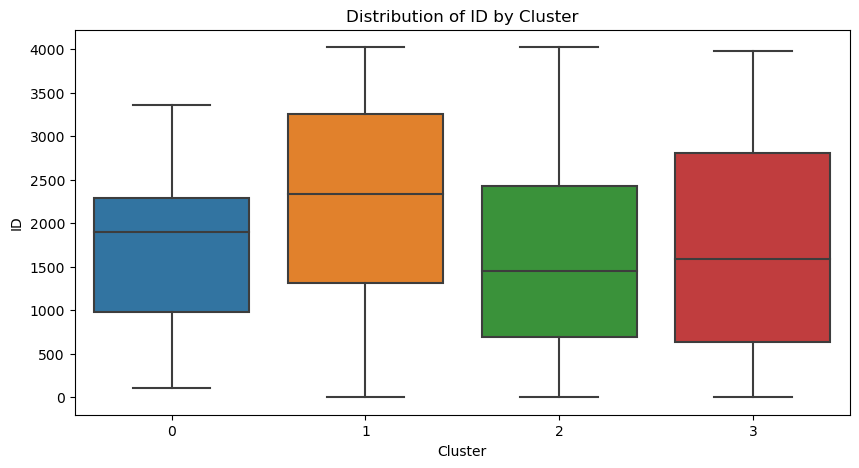

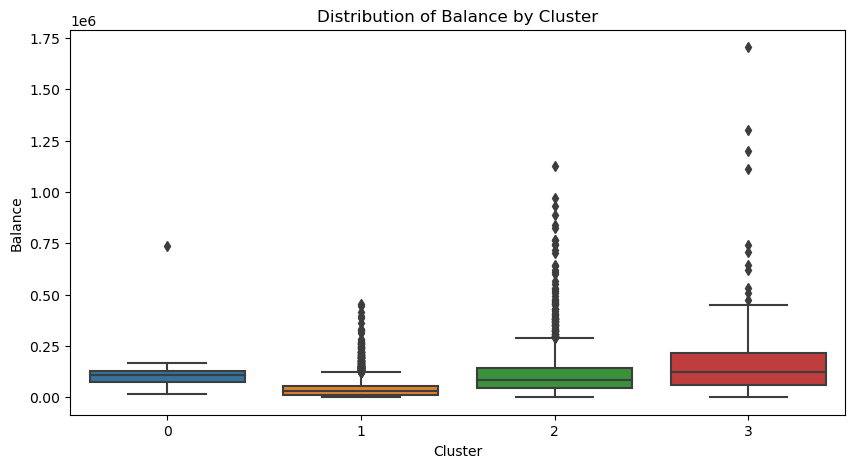

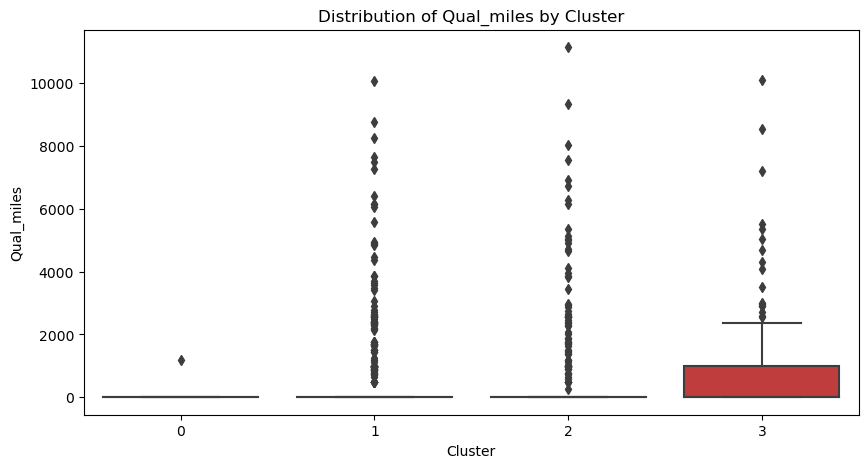

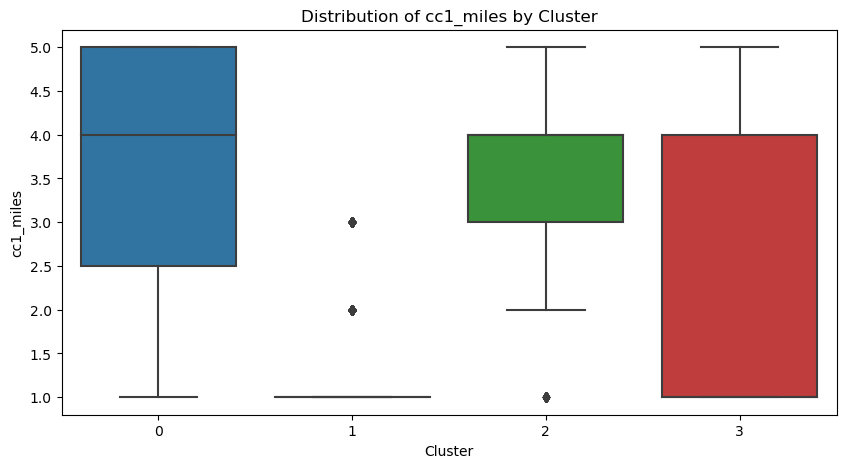

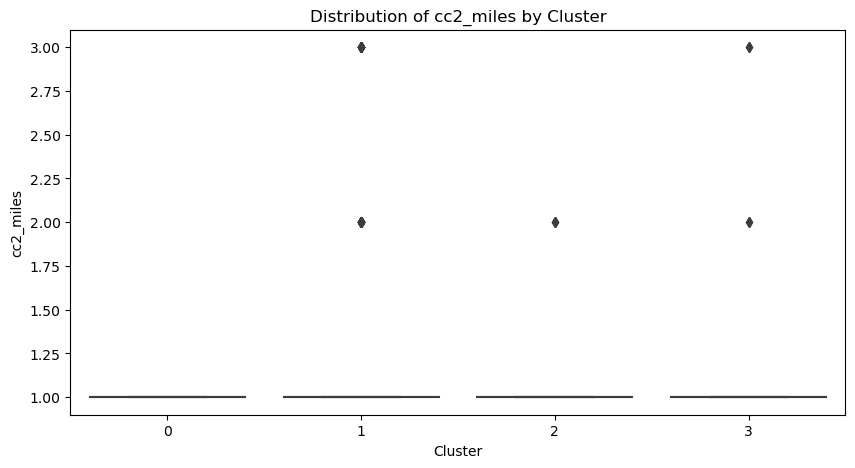

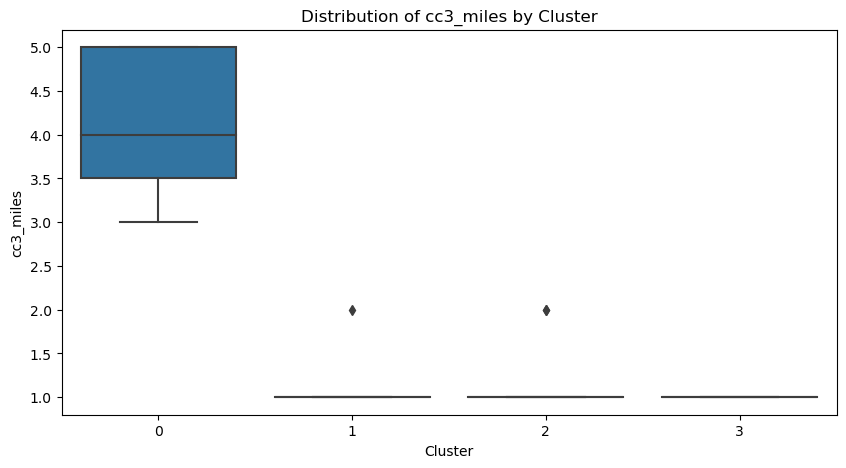

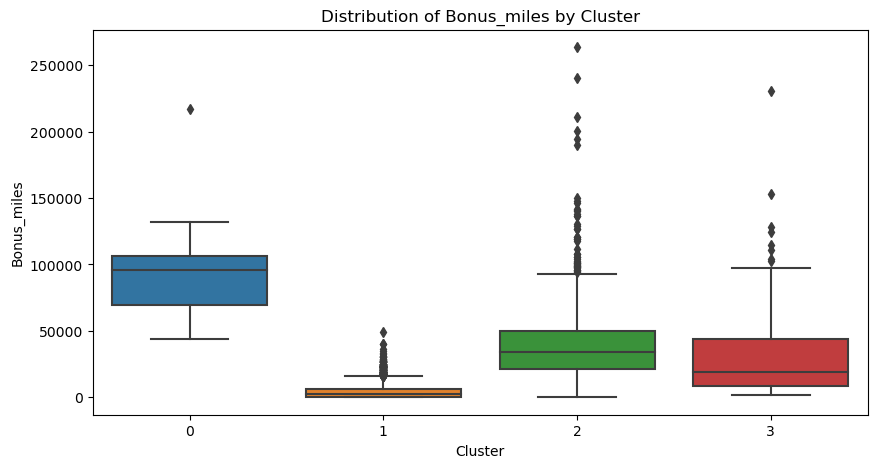

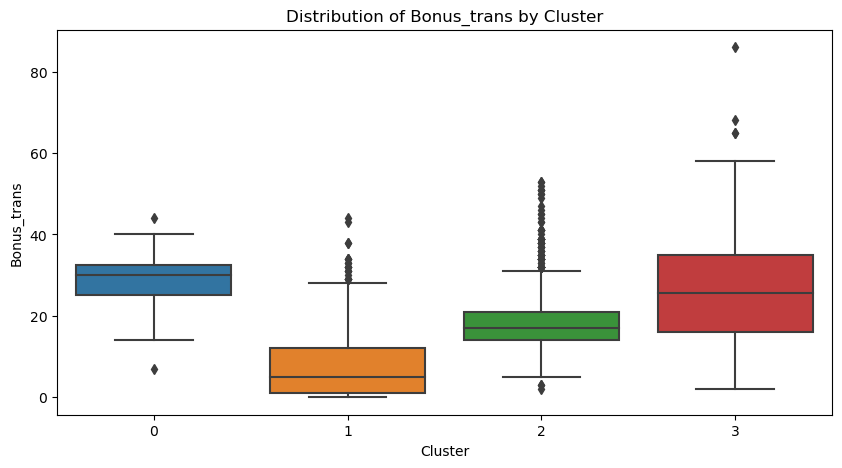

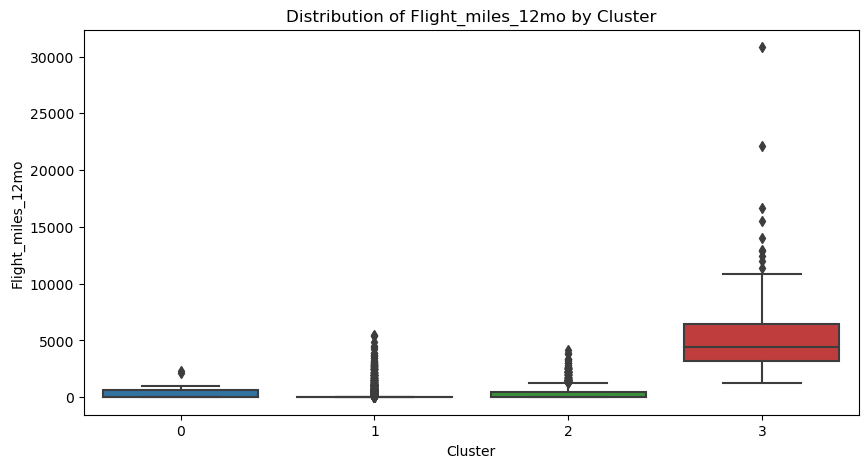

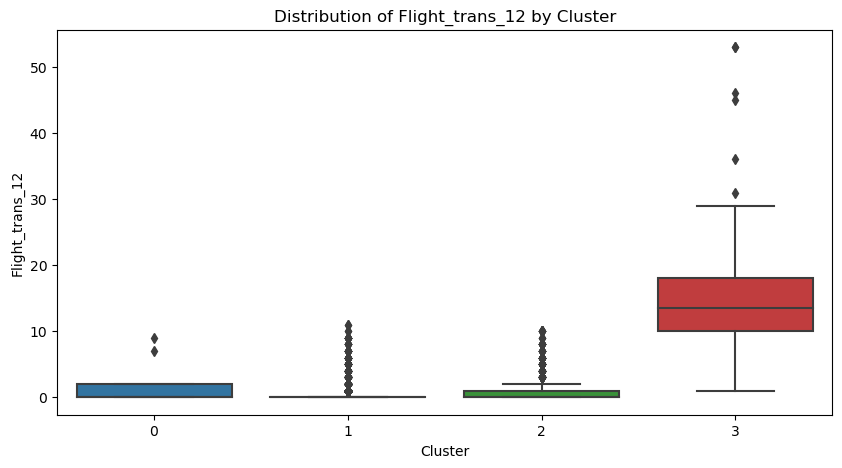

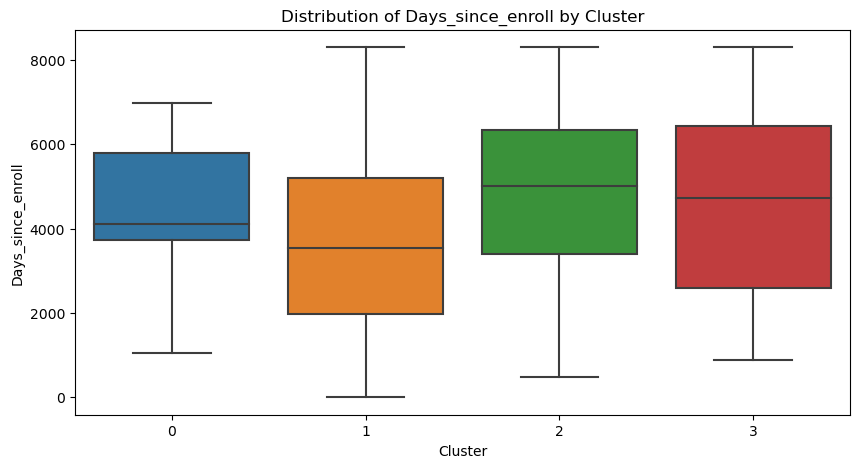

In [57]:
# Distribution of features within each cluster
for column in data.columns[:-1]:  # Exclude the Cluster column
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=cluster_labels, y=data[column])  
    plt.title(f'Distribution of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

## Findings

**Cluster Characteristics:**

- Cluster 0: High median bonus miles earned, indicating active participation in airline rewards programs.
- Cluster 1: Low median bonus miles earned, indicating limited participation in airline rewards programs.
- Cluster 2: Moderate median bonus miles earned, indicating moderate participation in airline rewards programs.
- Cluster 3: High median bonus miles earned, indicating active participation in airline rewards programs.

**Insights:**

- Analyze the cluster_summary to understand the characteristics of each cluster.
- Derive insights based on key features such as Balance and Bonus_miles.

## Conclusions
The clustering analysis of the EastWestAirlines dataset identified distinct customer segments based on bonus miles accumulation. High-bonus-mile segments suggest active loyalty program engagement, while low-bonus-mile segments indicate limited participation. These insights can inform targeted marketing and customer retention strategies.